In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from logistic import LossFuncSum

In [2]:
from optim import sgd, svrg

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

In [4]:
X_w5a, y_w5a = load_svmlight_file('data/w5a')
X_a9a, y_a9a = load_svmlight_file('data/a9a')

X_w5a_t, y_w5a_t = load_svmlight_file('data/w5a.t', n_features=X_w5a.shape[1])
X_a9a_t, y_a9a_t = load_svmlight_file('data/a9a.t', n_features=X_a9a.shape[1])

In [5]:
def plot_cmp(hist_sgd, hist_svrg, zoom1=None, zoom2=None, title='', save_name=''):
    plt.figure(figsize=(16, 12))
    plt.suptitle(title)
    
    ax1 = plt.subplot(211)
    plt.plot(hist_sgd['epoch'], hist_sgd['f'], label='SGD', linewidth=2)
    plt.plot(hist_svrg['epoch'], hist_svrg['f'], label='SVRG', linewidth=2)
    if zoom1:
        plt.ylim(zoom1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.ylabel('Function value')
    plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.grid(True)

    plt.subplot(212, sharex=ax1)
    plt.plot(hist_sgd['epoch'], hist_sgd['norm_g'], linewidth=2)
    plt.plot(hist_svrg['epoch'], hist_svrg['norm_g'], linewidth=2)
    if zoom2:
        plt.ylim(zoom2)
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.grid(True)
        
    if save_name:
        plt.savefig("pics/" + save_name, bbox_inches='tight')
    plt.show()

In [7]:
from logistic import LossFuncSum
def compare(X, y):
    fsum = LossFuncSum(X, y, reg_coef=1 / X.shape[0])
    x0 = np.zeros(X.shape[1])

    return sgd(fsum, x0, n_iters=20 * fsum.n_funcs, trace=True), svrg(fsum, x0, n_stages=3, trace=True, save_grad=True)

In [8]:
%time (x_sgd_best_w5a, hist_sgd_best_w5a), (x_svrg_best_w5a, hist_svrg_best_w5a) = compare(X_w5a, y_w5a)

CPU times: user 2min 45s, sys: 86.7 ms, total: 2min 45s
Wall time: 2min 45s


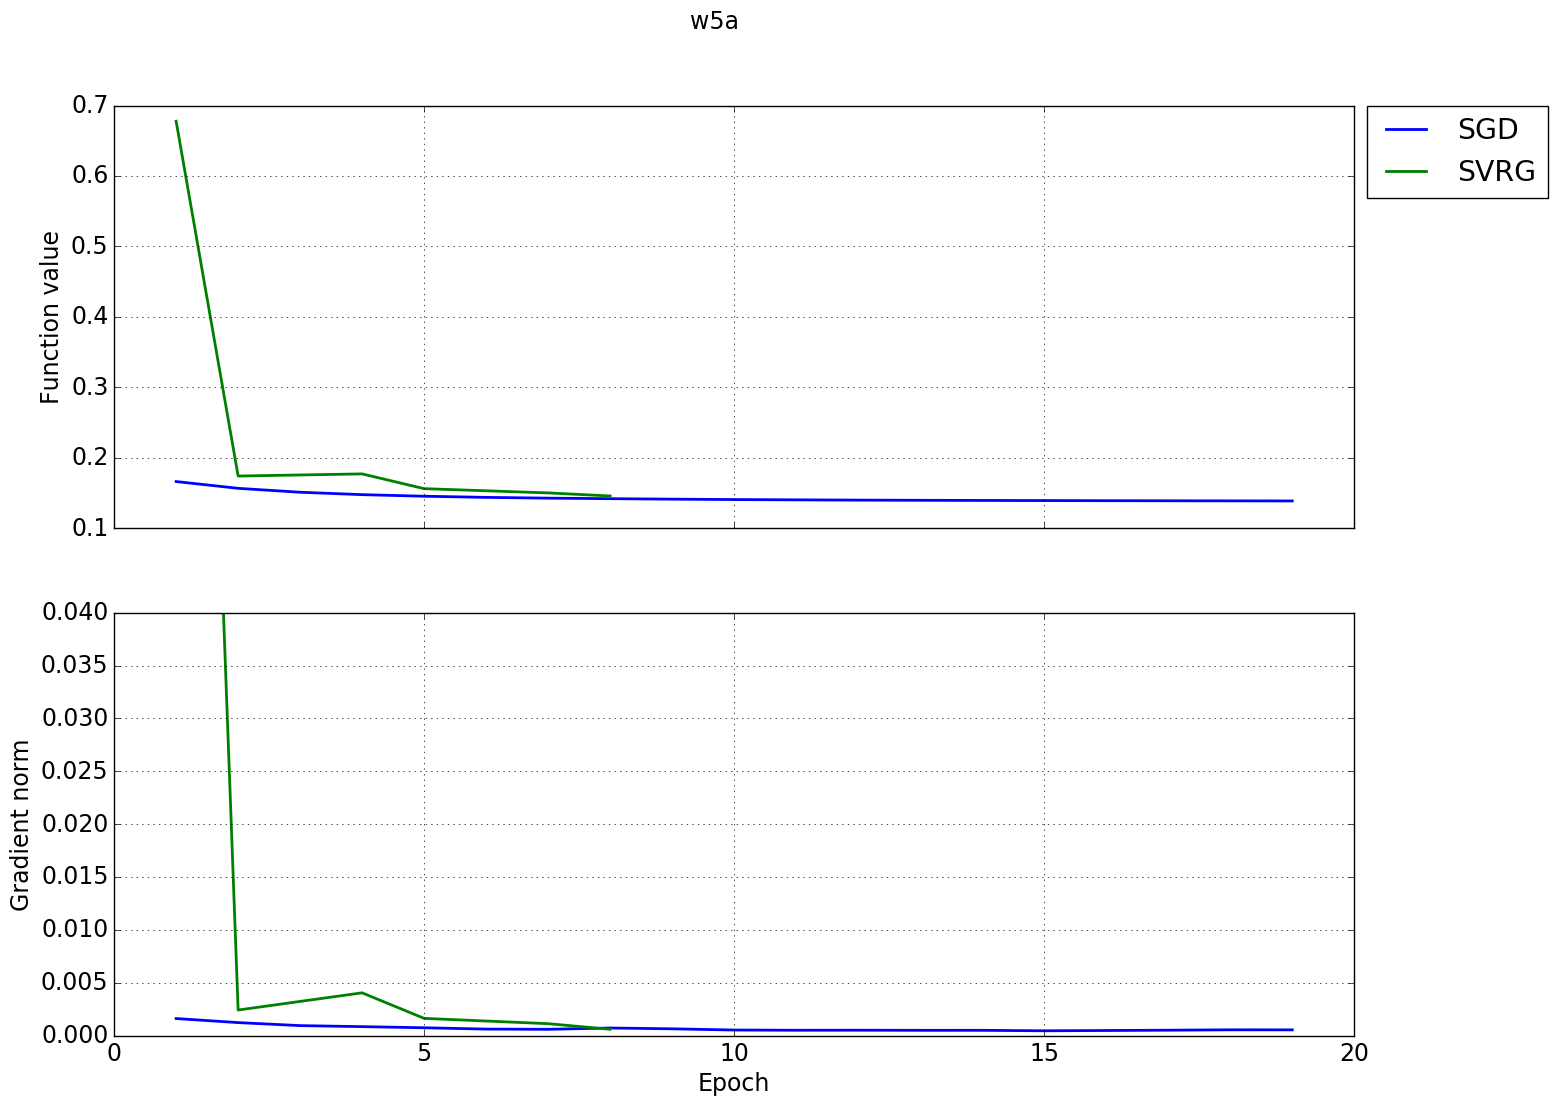

In [12]:
plot_cmp(hist_sgd_best_w5a, hist_svrg_best_w5a, zoom2=(0, 0.04), title='w5a', save_name='cmp_w5a_fix_step')

In [10]:
%time (x_sgd_best_a9a, hist_sgd_best_a9a), (x_svrg_best_a9a, hist_svrg_best_a9a) = compare(X_a9a, y_a9a)

CPU times: user 9min 17s, sys: 187 ms, total: 9min 17s
Wall time: 9min 17s


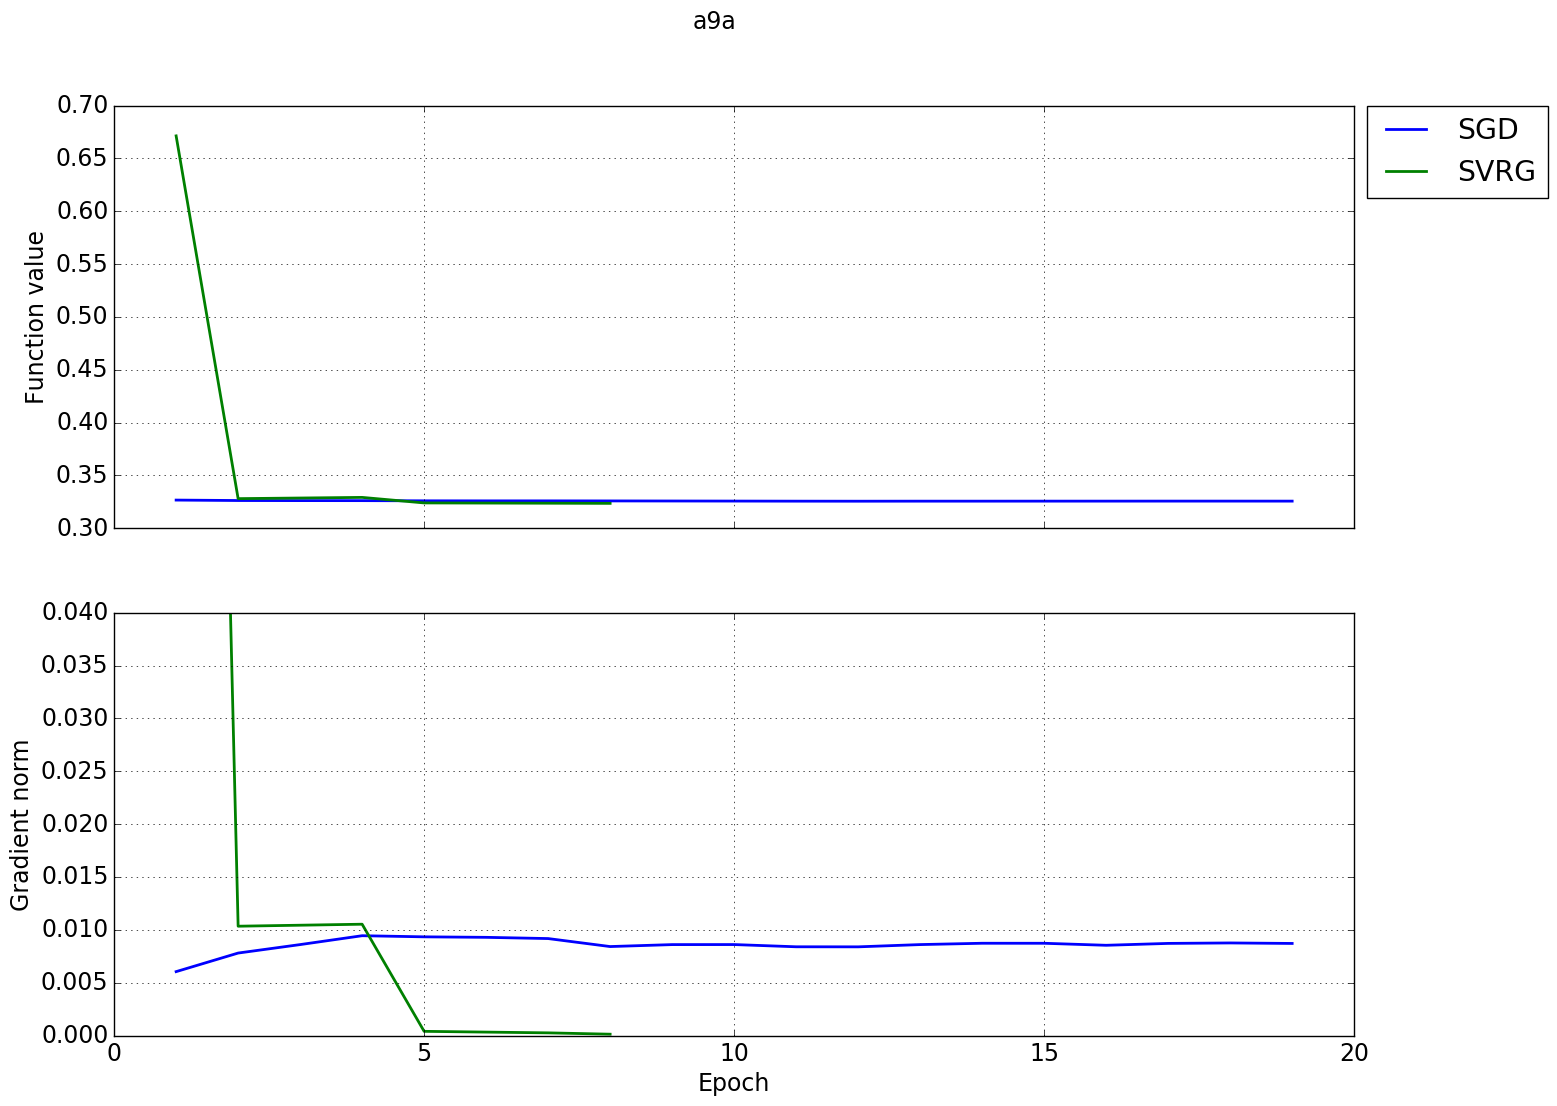

In [13]:
plot_cmp(hist_sgd_best_a9a, hist_svrg_best_a9a, zoom2=(0, 0.04), title='a9a', save_name='cmp_a9a_fix_step')